# Homework 2 (HW2)

By the end of this homework, we expect you to be able to:

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in Python;
- Carry out simple multivariate regression analyses;
- Use techniques to control for covariates;
- Conduct an observational study and reason about its results.

---

## Important Dates

- Homework release: Fri 18 Nov 2022
- **Homework due**: Fri 02 Dec 2022, 23:59
- Grade release: Mon 12 Dec 2022

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

Congratulations! You have just been hired as a data scientist at [FC Tokyo, a J1 League Japanese professional football club based in Chōfu, Tokyo](https://en.wikipedia.org/wiki/FC_Tokyo). The company hired you to carry out a variety of data-related tasks, which will be explained in further detail below.

Your manager, Mr. Naoki Ogane, has noticed that an unusually high number of players in your team have birthdays in either April or May, so he asked you to investigate this further -- is this just a coincidence, or are players born in April or May simply better?

## Data

To answer Mr. Ogane's questions, you will use data from Wikipedia biographies. This is a subset of the Pantheon dataset (1). For tasks 1 to 4, you will use the file `japanese_athletes.csv.gz`. For task 5, you will use the file `all_entities.csv.gz`. Both datasets are`.csv` files with the same columns:

- `id`: a unique identifier per individual.
- `name`: name of the individual.
- `occupation`: the occupation of the individual (for `japanese_athletes.csv.gz`, these are all sports-related).
- `gender`: gender of the athlete.
- `alive`: flag indicating if the athlete was alive in 2020 when the dataset was collected.
- `bplace_country`: the country where the athlete was born  (for `japanese_athletes.csv.gz`, the value here is always 'Japan').
- `birthdate`: the date when the athlete was born.
- `birthyear`: the year when the athlete was born.
- `pageviews`: number of pageviews received by the athlete's page across Wikipedia language editions.

(1) Yu, A. Z., et al. (2016). Pantheon 1.0, a manually verified dataset of globally famous biographies. Scientific Data 2:150075. doi: 10.1038/sdata.2015.75

## Task 1 — 20 pts

As a good data scientist, you first load the data and perform some small sanity checks on it.

**1.1** Load the dataset containing data about Japanese athletes into memory using pandas. First, load the data directly from the compressed file. Then, print the first few lines of the dataset.

**1.2** Find the different occupations in the data and how many individuals belong to each occupation.

**1.3** Calculate the percentage of individuals who remain alive in the data.

**1.4** Plot the distribution of birth years in the dataset. In other words, what fraction of individuals are born each year? (Note that the data contains individuals born only after the year 1900).

**1.5** Plot the empirical cumulative distribution function (CDF) to visualize the distribution of pageviews. Here you should use a linear scale for both the x-axis and the y-axis.

**1.6** **Discuss:** why is it hard to visualize the distribution in the above ECDF plot?

**1.7** Re-do the above CDF plot using a log scale for both the x-axis and the y-axis. Additionally, plot vertical lines that indicate the distribution's arithmetic and geometric means.

**1.8** **Discuss:** Visually, does it look like the distribution is a power law?

**1.9** Estimate the 95% confidence intervals of the geometric mean and the arithmetic mean of pageviews using bootstrap resampling.

**1.10** **Discuss:** What advantages does the geometric mean have over the arithmetic mean to summarize the distribution?

# Answers
### 1.1

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder= './data/'
data_file= 'japanese_athletes.csv.gz'
japanese_athletes= pd.read_csv(data_folder+data_file, compression='gzip' )
japanese_athletes.head()

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews
0,25864486,Hisataka Okamoto,SOCCER PLAYER,M,True,Japan,1933-12-14,1933.0,455.0
1,1682054,Kunishige Kamamoto,SOCCER PLAYER,M,True,Japan,1944-04-15,1944.0,57847.0
2,20639249,Akira Kitaguchi,SOCCER PLAYER,M,True,Japan,1935-03-08,1935.0,759.0
3,20641463,Tsukasa Hosaka,SOCCER PLAYER,M,False,Japan,1937-03-03,1937.0,1672.0
4,25864343,Takashi Kasahara,SOCCER PLAYER,M,True,Japan,1918-03-26,1918.0,541.0


### 1.2

In [65]:
occupations= japanese_athletes.occupation.unique()
print(f'different occupations in the data:\n{[elem for elem in occupations]} ')

different occupations in the data:
['SOCCER PLAYER', 'WRESTLER', 'ATHLETE', 'GYMNAST', 'SKIER', 'SWIMMER', 'SKATER', 'CYCLIST', 'TENNIS PLAYER', 'BASKETBALL PLAYER', 'BOXER'] 


In [66]:
print(f'number of individuals per occupation:')
japanese_athletes.groupby('occupation')['id'].count()

number of individuals per occupation:


occupation
ATHLETE                40
BASKETBALL PLAYER       2
BOXER                   2
CYCLIST                 4
GYMNAST                15
SKATER                 21
SKIER                  11
SOCCER PLAYER        3929
SWIMMER                21
TENNIS PLAYER          18
WRESTLER               60
Name: id, dtype: int64

### 1.3

In [67]:
alive_athletes= japanese_athletes[japanese_athletes.alive == True].alive.count()
total_athletes= japanese_athletes.alive.count()
print('percentage of athletes who remain alive: {:.3}%'.format((alive_athletes/total_athletes)*100))

percentage of athletes who remain alive: 97.2%


### 1.4

In [68]:
len(japanese_athletes.id.unique()) == len(japanese_athletes.id) #remove

True

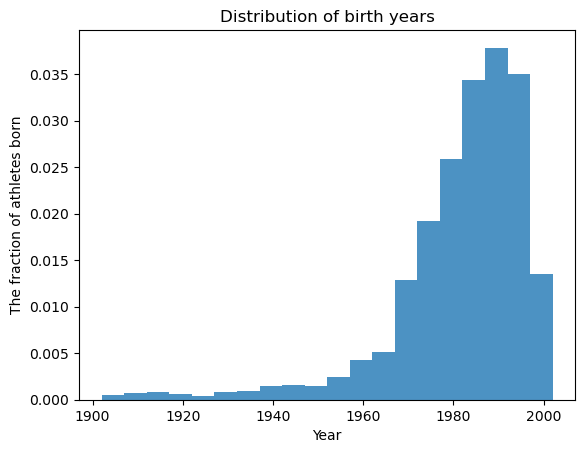

In [69]:
plt.hist(japanese_athletes.birthyear,bins=20, alpha=0.8, density=True)
plt.title('Distribution of birth years')
plt.ylabel('The fraction of athletes born')
plt.xlabel('Year')
plt.show()

### 1.5

<AxesSubplot:xlabel='pageviews', ylabel='Proportion'>

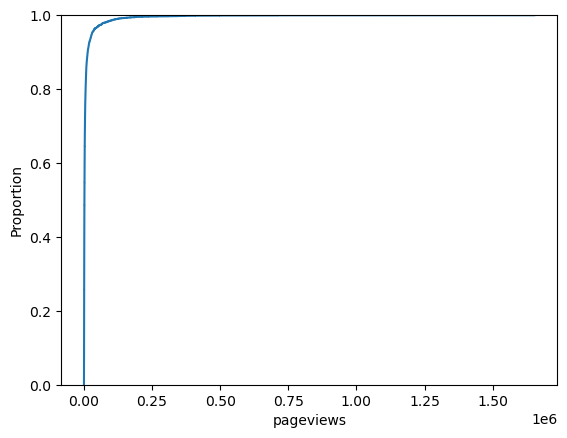

In [70]:
sns.ecdfplot(data=japanese_athletes,x='pageviews')

### 1.6

The only thing we can see is that there is most of athletes in the lowest part of the number of pageviews interval, which resembles heavy-tailed distribution. However, we can't say anything more about the distribution of the pageviews from the above ECDF because the plot doesn't reveal any other statistics about the data, due to the poor choice of a linear scale for both x-axis (ranging from 0 to 1500000) and y-axis (ranging between 0 and 1). Hence, no details of the distribution are visible.

### 1.7

In [71]:
from scipy import stats
arithmetic_mean= japanese_athletes.pageviews.mean()
geometric_mean= stats.gmean(japanese_athletes.pageviews)
arithmetic_mean , geometric_mean

(8678.479990298327, 2185.8108347071675)

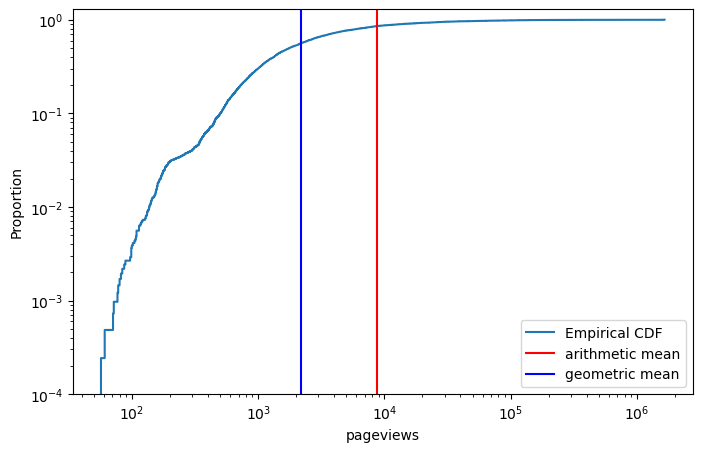

In [72]:
plt.figure(figsize=(8,5))

fig = sns.ecdfplot(data=japanese_athletes, x='pageviews', complementary=False, label='Empirical CDF')
fig.set(xscale='log')
fig.set(yscale='log')
fig.set_ylim(0.0001, 1.3)

fig.axvline(arithmetic_mean, color='red', label='arithmetic mean')
fig.axvline(geometric_mean, color='blue', label='geometric mean')
fig.legend()


### 1.8

Since we know that the log-log scale CCDF of a power law is a decreasing straight line, and the ECDF= 1-CCDF, then the log-log scale ECDF should look like an increasing straight line. Yet, we can see that it's not the case in our plot, thus we can conclude from this log-log scale ECDF that the distribution is not a power-law.

### 1.9

In [73]:
def bootstrap(samples, seed):
    np.random.seed(seed)
    return np.random.choice(samples, size=len(samples), replace=True)

def conf_interval_arithmetic_mean(series, n_samples=10000, confidence=0.95):
    means = np.zeros(n_samples)
    for i in range(n_samples):
        sample = bootstrap(series, seed=i)
        means[i] = (sample.mean())
    conf_interval = np.nanpercentile(means,[100*(1-confidence)/2, 100*(1-(1-confidence)/2)])
    return conf_interval

def conf_interval_geometric_mean(series, n_samples=10000, confidence=0.95):
    means = np.zeros(n_samples)
    for i in range(n_samples):
        sample = bootstrap(series, seed=i)
        means[i] = stats.gmean(sample)  
    conf_interval = np.nanpercentile(means,[100*(1-confidence)/2, 100*(1-(1-confidence)/2)])
    return conf_interval

In [74]:
conf_interval_arith_mean= conf_interval_arithmetic_mean(japanese_athletes.pageviews)
print(f"95% confidence interval of the arithmetic mean of pageviews: {conf_interval_arith_mean}")

95% confidence interval of the arithmetic mean of pageviews: [ 7529.01910017 10033.70904681]


In [75]:
conf_interval_geom_mean= conf_interval_geometric_mean(japanese_athletes.pageviews)
print(f"95% confidence interval of the geometric mean of pageviews: {conf_interval_geom_mean}")

95% confidence interval of the geometric mean of pageviews: [2096.45672708 2279.66630826]


### 1.10

Since our distribution is skewed, the geometric mean is more useful because it's less affected by extreme values (outliers) and fluctuations in the sample, than the arithmetic mean. It also gives more weight to small observations and does better with small samples. Hence, the geometric mean is a better measure of central tendency of skewed distributions than the usual arithmetic mean.

## Task 2 — 20 pts

Next, investigate the question posed by Mr. Ogane. *Why do so many Tokyo FC players have birthdays in the same month?* 
Here you will not look specifically at Tokyo FC players, but more generally at the birthdays of the athletes in the dataset you have explored in Task 1

**2.1** Calculate and plot the distribution of births (among the athletes contained in the Wikipedia dataset) over months, i.e., what percentage of births happen in January, February, etc.

**2.2** Puzzled with the results, you use census data to retrieve the percentage of births happening each month (this is given to you in an array below). Plot this distribution.

**2.3** **Discuss:** what is different between the distributions you ploted in **2.1** and **2.2**

After discussing with your colleagues at work, a theory comes to your mind: school in Japan starts in April. Children who were born between April 1 and March 31 of the following year are placed within the same grade. Therefore, you suspect that the observed pattern may have something to do with when students start school.

**2.4** Considering that students in Japanese schools have the same birth distribution over the months of the year as the overall Japanese population, i.e., the `birth_per_month` array that was provided to you, calculate:

- For students born in April, how many months older are they than the average student in their grade?
- For students born in March, how many months younger are they than the average student in their grade?

**2.5** **Discuss:** Considering your common sense and the results obtained from the simulation: what advantage do students born in April have over those born in March? How may this affect their odds of becoming professional athletes?

In [76]:
birth_per_month = np.array([
0.08118368,0.08148065, 0.08182577, 0.07982728, 0.08301363,
0.08422556, 0.08518067, 0.08925791, 0.08635247, 0.08460279,
0.08258825, 0.08046134
])

### 2.1

In [77]:
# Let's check first if there is NaN values in the birthdates.
japanese_athletes['birthdate'].isnull().values.any()

False

In [78]:
# Let's go through all the birthdates and classify them with a dictionary of months.

months = {"01" : 0, "02" : 0, "03" : 0, "04" : 0, "05" : 0, "06" : 0, "07" : 0, "08" : 0, "09" : 0, "10" : 0,
       "11" : 0, "12" : 0}

for date in japanese_athletes["birthdate"]:
    month_number_str = date.split("-")[1]
    months[month_number_str] += 1

# Calculating the percentage in relation to all athletes.

for key in months:
    months[key] = (months[key] / len(japanese_athletes)) * 100


array([[<AxesSubplot:title={'center':'birthmonth'}>]], dtype=object)

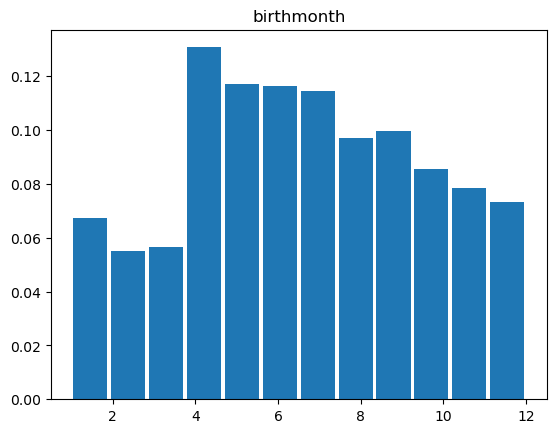

In [79]:
japanese_athletes['birthmonth'] = pd.to_datetime(japanese_athletes['birthdate']).apply(lambda x: x.month)
japanese_athletes.hist(column='birthmonth', bins=12, density=True, grid=False, rwidth=0.9)

(0.0, 15.0)

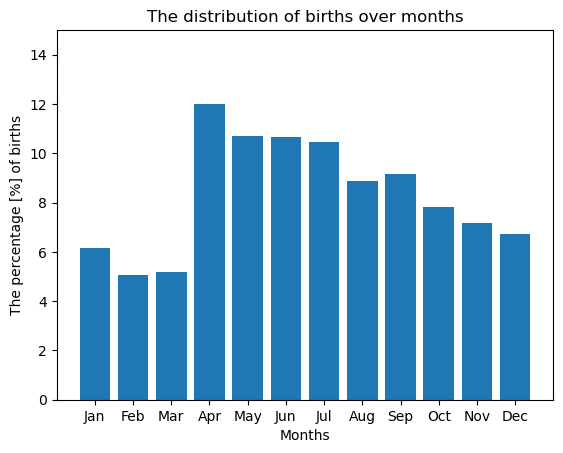

In [80]:
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.bar(month_names, months.values())
plt.xlabel("Months")
plt.ylabel("The percentage [%] of births")
plt.title("The distribution of births over months")
plt.ylim([0, 15])

### 2.2

(0.0, 15.0)

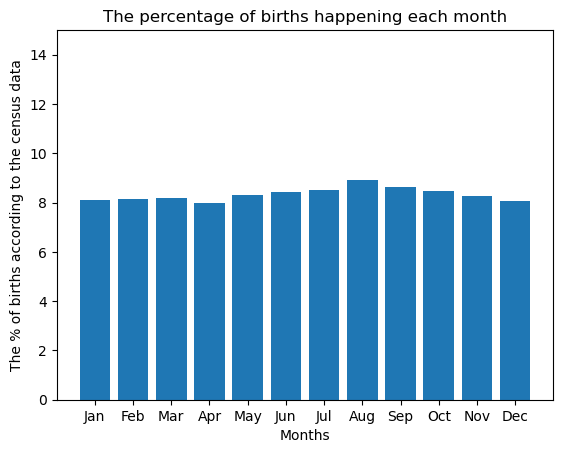

In [81]:
# First, let's change the values to percentages.
birth_per_month_percentage = birth_per_month * 100

plt.bar(month_names, birth_per_month_percentage)
plt.xlabel("Months")
plt.ylabel("The % of births according to the census data")
plt.title("The percentage of births happening each month")
plt.ylim([0, 15])

### 2.3

The difference between the two distributions is obvious. When using the data of Japanese athletes, indeed, the majority of the athletes were born in April or in May whereas in the census data, the distribution is more flat. For example, in the plot 2.1, there is a huge difference of 7 % between the months March and April. In the plot 2.2, the largest difference between two consecutive months remains around 0.5 %.

### 2.4

In [82]:

# Let's calculate in which month an average person was most likely born. 

months = [1,2,3,4,5,6,7,8,9,10,11,12]
# calculate the mean of binned data based on the midpoints - month numbers
product = months * birth_per_month
average_month = product.sum()   
average_month = round(average_month) # round, because bin belonging to each month is <num_of_month - 0.5, num_of_month + 0.5)
print(average_month)



7


In [83]:
# So an average student is most likely born in July.

print("For students born in April, they are", average_month-4, "months older than the average student.")

# The number 15 corresponds to the March of the next year (Dec+Jan+Feb+Mar).
print("For students born in March, they are", 15-average_month, "months younger than the average student.")


For students born in April, they are 3 months older than the average student.
For students born in March, they are 8 months younger than the average student.


### 2.5

In the same class, the largest gap between two ages can be almost one year (for example, if we take two people born in early April and late March of the next year). Because children develop quickly, that difference in that young age is large, so that the older children can be more widely developed than the younger children. This can speak to both physical side and mental side of the development. Thus, school can be relatively easier for the older people which leaves more time to do sports for them. Also, as older children have more developed physique, they can more easily outperform their younger counterparts and thus be selected to sports clubs and because of this also more motivated to continue in the sporting career. This may have an effect on becoming professional athletes, but still, to confirm such a theory the data is not experssive enough. So we cannot yet easily explain why the majority of the Japanese athletes are born mainly in April or May.

## Task 3 — 20 pts

You report your findings to Mr. Ogane, who receives them with great interest. He asks you: *is there a causal effect between being older than your peers and becoming a Wikipedia-famous athlete?* (Here, “Wikipedia-famous” refers to those individuals notable enough to have made it into English Wikipedia.)

**3.1** Create a new column in the dataframe called `date_diff` representing the distance between the athlete's birthdate and the cutoff date of his school class. 
- For individuals born in April, May, June, July, August, and September: The distance should be positive and represent the number of days between the birthdate and the previous April 1. For example, if someone is born on April 1, the distance is 0, if someone is born on April 10, the distance is 9, etc.
- For individuals born in October, November, December, January, February, and March: The distance should be negative and represent the number of days between the following April 1 and the birthdate. For example, if someone is born on March 31, the distance is -1; if someone is born on March 27, the distance is -5.
- Print the `date_diff` for the athletes with ids:  `20639249` and `58982155`.

**3.2** Create three numpy arrays `x`, `y`, and `ind` all of size 360. 
- `x` should contain the integers between -180 and 179 (-180 and 179 inclusive). 
- `y` should contain the percentage of athletes born with a `date_diff` equal to the corresponding value of `x`.
- `ind` should contain 0 if `x` is smaller than zero and 1 if `x` is bigger or equal to zero.


**3.3** Estimate the following linear regression: `y ~ x + ind` using `statsmodels`. Report the summary of the model.

**3.4** **Discuss:** What does the coefficient associated with the dummy variable `ind` captures in the above regression?

**3.5** Use the model parameters to estimate the percentage of athletes born on March 31st, i.e., use the intercept ($\beta_0$) and the coefficient associated with `x` ($\beta_1$) and calculate: $\beta_0 - 1 * \beta_1$ (recall that $x$ equals -1 in March 31st).

**3.6** Use the model parameters to estimate the percentage of athletes born on April 1st.

**3.7** **Discuss:** Drawing from your knowledge of observational studies and the questions answered thus far, respond to Mr. Ogane's question: *is there a causal effect between being older than your peers and becoming a Wikipedia-famous athlete?* Explain whether the evidence you have obtained is convincing and why.

---

**Comment**: Note that in **3.2**, the size of the array created is slightly smaller than the number of days in the year. This is for simplicity's sake.

### 3.1

In [84]:
import datetime

# Convert the data to datetime format
japanese_athletes["birthdate"] = pd.to_datetime(japanese_athletes["birthdate"], infer_datetime_format=True)

next_year_indicator = [10,11,12]
japanese_athletes["cutoff_date"] = japanese_athletes["birthdate"].apply(lambda x: datetime.datetime(x.year, 4, 1) \
                                                if x.month not in next_year_indicator else datetime.datetime(x.year+1, 4, 1))
japanese_athletes["date_diff"] =  (japanese_athletes["birthdate"] - japanese_athletes["cutoff_date"]).apply(lambda x: x.days)

print(f"date_diff for athlete with id  20639249: {japanese_athletes[japanese_athletes['id']==20639249]['date_diff'].values[0]}")
print(f"date_diff for athlete with id  58982155: {japanese_athletes[japanese_athletes['id']==58982155]['date_diff'].values[0]}")

date_diff for athlete with id  20639249: -24
date_diff for athlete with id  58982155: 6


In [85]:
#for check: 
print(f"birthdate for athlete with id  20639249: {japanese_athletes[japanese_athletes['id']==20639249]['birthdate'].dt.strftime('%m-%d').values[0]}")
print(f"birthdate for athlete with id  58982155: {japanese_athletes[japanese_athletes['id']==58982155]['birthdate'].dt.strftime('%m-%d').values[0]}")


birthdate for athlete with id  20639249: 03-08
birthdate for athlete with id  58982155: 04-07


### 3.2

In [86]:
x = np.arange(-180, 180)
y = np.array([japanese_athletes[japanese_athletes["date_diff"]==i]["id"].count()/japanese_athletes["id"].count() for i in x])
ind = np.array([0 if i < 0 else 1 for i in x])

### 3.3

In [87]:
import statsmodels.api as sm

model_data = np.c_[x, ind]
model_data = sm.add_constant(model_data)
linear_regression_model = sm.OLS(y, model_data) # Ordinary Least Squares
res = linear_regression_model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     118.8
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           2.87e-40
Time:                        15:14:29   Log-Likelihood:                 2019.2
No. Observations:                 360   AIC:                            -4032.
Df Residuals:                     357   BIC:                            -4021.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.000     14.696      0.0

### 3.4
The coefficient captures the additional bias between two groups: people born before and after the cut-off date. In other words how much of a fraction born difference there is between those specific groups.

### 3.5

In [88]:
perc_athletes_born_31march = res.params[0] + (-1)*res.params[1] + 0*res.params[2]
print(f"Percentage of athletes born on 31st of march: {perc_athletes_born_31march*100:.4f}%")

Percentage of athletes born on 31st of march: 0.1554%


In [89]:
print(res.params)

[ 1.54767212e-03 -5.94682534e-06  2.37880703e-03]


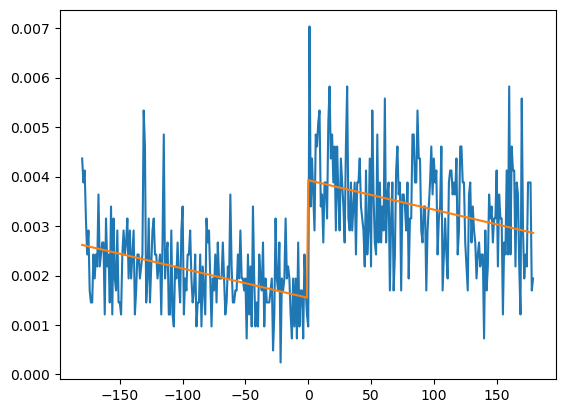

In [90]:
plt.plot(x, y)
plt.plot(x, res.fittedvalues)

### 3.6
In order to estimate the percentage of athletes born on 1st of April, we calculate the outcome like in subpoint 3.5

In [28]:
perc_athletes_born_1april = res.params[0] + 0*res.params[1] + res.params[2]*1
print(f"Percentage of athletes born on 1st of april: {perc_athletes_born_1april*100:.4f}%")

Percentage of athletes born on 1st of april: 0.3926%


### 3.7
Regression model tells us, that more athletes are born in the beginning April than in end of March. This may be the indicator for further investigation. We cannot be sure if this is the proof for the casual effect between being older and becoming wikipedia-famous athlete. There is little information about the process of data collecting. If we assume, that all of the athletes in data are well-known (are in english Wikipedia) and they are the best athletes, then it means that the casual effect might be true. Atheletes taken into consideration vary in age and popularity. Thus, we should investigate it furthermore to try to eliminate unobserved covariates and match more comparable people.

## Task 4 — 20 pts

You return to Mr. Ogane with your findings, which he again receives with great interest. The sharp manager, however, asks a question that ignites your curiosity: *are athletes that are born right after the school cut-off date (i.e., in April or May) simply better?**

To understand if that is the case, you come up with a plan: the number of pageviews received by a Wikipedia page is a good way to differentiate between mildly famous athletes and truly famous ones. Thus you can do a matched analysis comparing athletes born in February or March (right before the cut-off) with athletes born in April or May (right after the cut-off); you should discard all athletes that were not born in one of these four months.

To make matched athletes even more comparable, you will also only consider pairs of athletes that:
1. were born in the same year; 
2. have the same gender; and
3. have the same occupation.

Matching should be done 1-to-1; i.e., each athlete born in February/March should be matched to one and only one athlete born in April/May (there will naturally be some athletes left unmatched).

**4.1** Obtain the matched data described in the text above. Report the number of matched pairs and the number of discarded athletes. Your resulting dataframe should contain one row per athlete and an indicator variable `is_after`, which equals 1 when the athlete was born in April or May and 0 otherwise. Note that here you are doing exact matching, and not propensity score matching!

**4.2** The number of pageviews is heavy-tailed, as we have seen in Task 1. Create a new column in your matched dataframe containing the natural logarithm of the number of pageviews.

**4.3** Assuming that whether the athlete is born in the two months right before the cutoff (February and March) or the two months right after (April and May) is assigned at random, use a linear regression to estimate the effect of being born after rather than before the cutoff date in the number of pageviews athletes receive. Use the log-transformed value you calculated in **4.2** as the outcome of your model (i.e., the $y$ of the regression). Report the summary of your model.


**4.4** **Discuss:** Interpret the coefficients obtained from the linear regression.

**4.5** Interpreting the results obtained throughout this homework, create a short text (max. 250 words) where you:
- Present and explain a credible causal diagram capturing the relationship between the variables below, and justify your causal diagram given the questions answered in this homework:
    1. "Skill": an individual's innate talent towards a sport.
    2. "Relative Age": how old an individual was in comparison to his or her peers.
    3. "Success before adulthood": how successful the individual is as an athlete as a child/teenager.
    4. "Success as an adult": how successful the individual is as an athlete as an adult.
- **Discuss:** Consider two equally successful children athletes, one born on March 31 and the other on April 1 — which will likely be more successful as an adult? Your answer should be consistent with your causal diagram.

---


### 4.1

In [54]:
#Discard all atletes not born in Feb, Mar, Apr or May and create is_after field
japanese_athletes_cp = japanese_athletes.copy()
japanese_athletes_cp['is_after']=japanese_athletes_cp.apply(lambda x: \
                                1 if x.birthdate.month==4 or  x.birthdate.month==5 else \
                                0 if x.birthdate.month==2 or  x.birthdate.month==3 else \
                                -1, axis=1)

jap_athl_filtered = japanese_athletes_cp.drop(japanese_athletes_cp[japanese_athletes_cp.is_after == -1].index)
jap_athl_filtered['year'] = jap_athl_filtered['birthdate'].apply(lambda x: x.year)

print(f"Number of discarded athletes is {japanese_athletes_cp.shape[0] - jap_athl_filtered.shape[0]}")
jap_athl_filtered.sample(4)


Number of discarded athletes is 2765


,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews,birthmonth,cutoff_date,date_diff,is_after,year
2196,20268358,Daishiro Miyazaki,SOCCER PLAYER,M,True,Japan,1983-04-21,1983.0,443.0,4,1983-04-01,20,1,1983
3144,35797196,Katsunari Mizumoto,SOCCER PLAYER,M,True,Japan,1990-02-19,1990.0,1102.0,2,1990-04-01,-41,0,1990
1106,26901829,Tomoji Eguchi,SOCCER PLAYER,M,True,Japan,1977-04-22,1977.0,1069.0,4,1977-04-01,21,1,1977
3731,39262206,Taisuke Mizuno,SOCCER PLAYER,M,True,Japan,1993-05-04,1993.0,1503.0,5,1993-04-01,33,1,1993


In [55]:
import networkx as nx
i = 0
G = nx.Graph()
for name, group in jap_athl_filtered.groupby(['year', 'occupation', 'gender']): # group by given criteria
    
    # create bipartite edges between all people between after and before cutoff groups
    # using index as it is unique and easy to filter the dataset after matching with it
    
    edges = [(i, j) for i in group[group.is_after == 1].index.values for j in group[group.is_after == 0].index.values] 
    G.add_edges_from(edges) # add edges to the graph

matching = nx.maximal_matching(G) # create matching
print(f"Total number of obained matches is {len(matching)}")

Total number of obained matches is 358


In [31]:
ids = list(sum(matching, ())) #flatten the matches
jap_athl_fin = jap_athl_filtered.loc[ids]
print(f"Total number of dropped athletes is {japanese_athletes.shape[0]-jap_athl_fin.shape[0]},\
     with {jap_athl_fin.shape[0]} remaining.")

Total number of dropped athletes is 3407,     with 716 remaining.


### 4.2

In [32]:
jap_athl_fin['pageviews_log'] = jap_athl_fin['pageviews'].apply(np.log)

### 4.3

In [33]:
y = jap_athl_fin['pageviews_log']
model_data = jap_athl_fin['is_after']
model_data = sm.add_constant(model_data)
linear_regression_model = sm.OLS(y, model_data) # Ordinary Least Squares
res = linear_regression_model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          pageviews_log   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05839
Date:                Fri, 02 Dec 2022   Prob (F-statistic):              0.809
Time:                        13:38:39   Log-Likelihood:                -1258.2
No. Observations:                 716   AIC:                             2520.
Df Residuals:                     714   BIC:                             2530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8307      0.074    105.489      0.0

const       7.830721
is_after    0.025367
dtype: float64

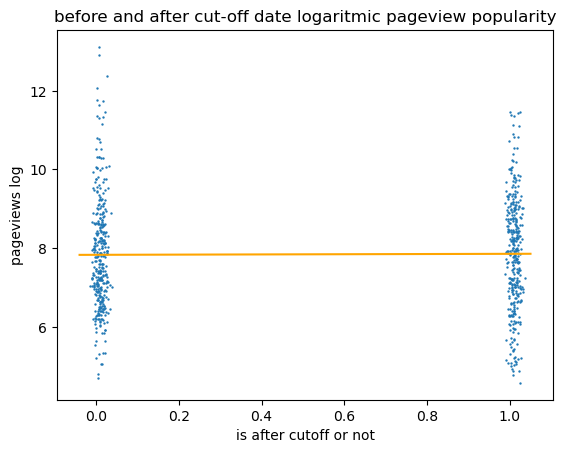

In [60]:
sigma = 0.01
mu = 0.01
noise = sigma * np.random.randn(jap_athl_fin.shape[0]) + mu

plt.scatter(x=jap_athl_fin['is_after'].values + noise, y=jap_athl_fin['pageviews_log'].values, s=0.5)
plt.xlabel('is after cutoff or not')
plt.ylabel('pageviews log')
plt.title("before and after cut-off date logaritmic pageview popularity")
line_x = np.array([-0.04,1.05])
plt.plot(line_x, line_x*res.params['is_after'] + res.params['const'], color='orange')
res.params

### 4.4

The resulting coefficients describe a line connecting means between the after and before cutoff groups. Visualization is for better understanding attached above. The first obtained coefficient describes the intersection with the y-axis and second describes the slope of the connecting line. We can see from the visualization that the slope is very low and what is more, confidence bounds for this coefficient are both positive and negative, so we can't infer anything about after-cutoff athletes being more popular. The results are in favor of them showing the same amount of popularity.

### 4.5


4.5 Interpreting the results obtained throughout this homework, create a short text (max. 250 words) where you:

Present and explain a credible causal diagram capturing the relationship between the variables below, and justify your causal diagram given the questions answered in this homework:

"Skill": an individual's innate talent towards a sport.

"Relative Age": how old an individual was in comparison to his or her peers.

"Success before adulthood": how successful the individual is as an athlete as a child/teenager.

"Success as an adult": how successful the individual is as an athlete as an adult.

Discuss: Consider two equally successful children athletes, one born on March 31 and the other on April 1 — which will likely be more successful as an adult? Your answer should be consistent with your causal diagram.




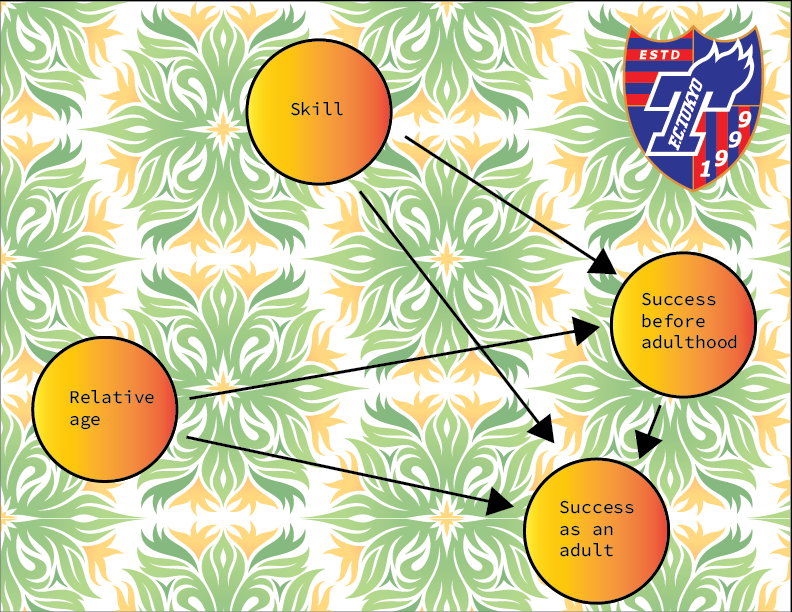

In [96]:
from IPython.display import Image
Image("./causal_diagram.png", width=800,height=600)

In the data there is no information about the age at which athletes are/were successful. Therefore it is hard to distinguish between adults and children, based on the data. We got to know for sure that there is a relation between relative age and achieved success.

Relative age —> success before adulthood
In our opinion, there is a relative age causal effect on success before adulthood. Additionally it is more sensible, that relative age influences the success more as a child than as an adult, because there is a bigger gap in development of a child.

Relative age —> success as an adult
Being not able to distinguish between success as an adult and as a child, from the results of our analysis, we also conclude that relative age must influence the success as an adult. Probably most of the athletes whose data was collected are adults, as for each of them there are Wikipedia pageviews (usually children are not mentioned in wiki pages).

For further connections we do not have any relevant data, so the answers were based on our common sense.

Skill —> Success before adulthood and skill —> success as an adult
Having more skills means that you have a bigger chance to beat the other athletes which leads to greater success.

Success before adulthood —> success as an adult
Based on our common sense, having successes, which motivate you and the proper mindset for discipline, diet, progressive training, before being an adult, surely influences the further career. 

Based on the causal diagram, we can see that relative age influences indirectly, through the success before adulthood, the success as an adult. But our casual diagram tells nothing about differences between two equally successful people. Thus, we conclude that the athlete born on April 1 will be equally successful as an adult to the person born on March 31, because they were equally successful in the one moment of the past. 

## Task 5 — 20 pts

Your findings in Task 4 provide important information for Tokyo FC to scout for young athletes. However, Mr. Ogane points out that other countries have messier cut-off dates for school (e.g., in the U.S., it varies widely by state), and thus the results may be less applicable to other countries.

While you could investigate specific cut-off dates per country, you decide to first use your machine learning skills to get a sense of how promising your efforts might turn out to be. This is made easy as you find an extended version of the dataset you've been working on so far, which contains data about all Wikipedia biographies all around the world

**5.1**Load the dataset containing data about Wikipedia-famous individuals into memory using pandas. You should load the data directly from the compressed file. Then, print the first few lines of the dataset.


**5.2** Create two columns in this dataframe:
- `is_athlete` an indicator variable which equals 1 if the occupation of an individual is related to a sport (you are provided with a list below) and 0 otherwise.
- `dayofyear` an integer between 1 and 366 indicating on which day of the year the individual was born.

**5.3** For each country:
- Create a training set with 80% of the individuals and a test set with the remaining 20%;
- Train a random forest model (using `sklearn`, you can use the default parameters) to predict whether an individual is an athlete or not based on: 1) the day of the year they were born `dayofyear`; 2) the year they were born (e.g., 1964, year should be a numerical variable) and 3) their gender.
- report the precision of your classifier for each country.

**5.4** Estimate the percentage of `athlete` individuals per country (simply by counting in the data).

**5.5** **Discuss:** how can the results from **5.4** impact the metric (precision) used in **5.3**? What could be a better suited metric to use here?

**5.6** Repeat the procedure done in **5.3**, but now calculate the metric you proposed in **5.5**.

**5.7** **Discuss:** according to this analysis, in which other countries might you be able to use the date of birth to recruit good athletes? Justify.

In [36]:
athlete_categories = {
    'ATHLETE',
    'BASKETBALL PLAYER',
    'BOXER',
    'CYCLIST',
    'GYMNAST',
    'HANDBALL PLAYER',
    'HOCKEY PLAYER',
    'SKATER',
    'SKIER',
    'TENNIS PLAYER',
    'SOCCER PLAYER',
    'SWIMMER',
    'WRESTLER'
}

### 5.1

In [37]:
data_file= 'all_entities.csv.gz'
all_entities= pd.read_csv(data_folder+data_file, compression='gzip' )
all_entities.head()

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews
0,4848272,Donald Trump,POLITICIAN,M,True,United States,1946-06-14,1946.0,10221172.0
1,13623554,Che Guevara,SOCIAL ACTIVIST,M,False,Argentina,1928-06-14,1928.0,3660108.0
2,1687680,Pope Francis,RELIGIOUS FIGURE,M,True,Argentina,1936-12-17,1936.0,3893767.0
3,21492751,Nelson Mandela,SOCIAL ACTIVIST,M,False,South Africa,1918-07-18,1918.0,4359499.0
4,63747,Muhammad Ali,BOXER,M,False,United States,1942-01-17,1942.0,3940228.0


### 5.2

In [38]:
all_entities['is_athlete'] = all_entities.occupation.apply(lambda x: x in athlete_categories)
all_entities['dayofyear'] = all_entities.birthdate.apply(lambda x: pd.Period(x, freq='C').day_of_year)
all_entities['year'] = all_entities.birthdate.apply(lambda x: pd.to_datetime(x).year)

### 5.3

In [39]:
# solve NAs before training
all_entities.isna().sum()

id                0
name              0
occupation        0
gender            7
alive             0
bplace_country    0
birthdate         0
birthyear         0
pageviews         0
is_athlete        0
dayofyear         0
year              0
dtype: int64

In [40]:
# there are some in the gender column, lets just drop them because we cant fill it reasonably
all_entities = all_entities.dropna(subset='gender')

In [41]:
def split_set(data_to_split, ratio=0.8):
    mask = np.random.rand(len(data_to_split)) < ratio
    return [data_to_split[mask].reset_index(drop=True), data_to_split[~mask].reset_index(drop=True)]

In [42]:
# split the data into train and test
all_entities_rf = all_entities.copy()
features = ['dayofyear', 'year', 'gender']

train, test = split_set(all_entities_rf)

X_train = pd.get_dummies(train[features]) # create dummies for categorical variables
X_test = pd.get_dummies(test[features])

y_train = train['is_athlete']
y_test = test['is_athlete']

In [43]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [44]:
y_est = clf.predict(X_test) # estimate values on test set

In [45]:
def get_precision(true_label, prediction):
    TP = np.sum(np.logical_and(true_label==1, prediction==1))
    FP = np.sum(np.logical_and(true_label==1, prediction==0))
    return TP/(TP+FP) if (TP+FP) !=0 else np.nan


In [46]:
countries = test.bplace_country.unique() # get all countries covered in the test data

precisions = []
for country in countries:
    mask = test.bplace_country == country
    precisions.append(get_precision(y_test[mask], y_est[mask]))

In [47]:
df = pd.DataFrame({'country': countries, 'precision': precisions})
df.sort_values(by='precision', ascending=False)

,country,precision
14,Turkey,0.882353
15,Iran,0.800000
36,Serbia,0.734694
23,Ireland,0.714286
26,Japan,0.709951
2,Spain,0.707547
10,Brazil,0.687075
13,Mexico,0.680000
39,Croatia,0.677966
20,France,0.674208


### 5.4

In [48]:
countries = all_entities.bplace_country.unique() # get all countries 

athlete_percentages = []
for country in countries:
    countrymen = all_entities[all_entities.bplace_country == country]
    athlete_percentages.append((countrymen.is_athlete==1).sum()/countrymen.shape[0])

In [49]:
df = pd.DataFrame({'country': countries, 'athl_percentages': athlete_percentages})
df.sort_values(by='athl_percentages', ascending=False)

,country,athl_percentages
15,Japan,0.849053
34,Uruguay,0.840467
8,Brazil,0.831585
37,Croatia,0.730120
1,Argentina,0.728380
24,Serbia,0.713896
25,Portugal,0.656250
3,Spain,0.651750
22,Netherlands,0.651589
18,Czechia,0.640000


### 5.5

The percentage of athletes is ranging throughout almost the whole spectrum. Starting at 5% ranging up to 85%. We can see that the classes are very unbalanced among the categories so a better measure would be F1-Score.

### 5.6

In [50]:
def get_F1Score(true_label, prediction):
    TP = np.sum(np.logical_and(true_label==1, prediction==1))
    TN = np.sum(np.logical_and(true_label==0, prediction==0))
    FP = np.sum(np.logical_and(true_label==0, prediction==1))
    FN = np.sum(np.logical_and(true_label==1, prediction==0))

    recall = TP/(TP+FN) if (TP+FN) !=0 else np.nan
    precision = TP/(TP+FP) if (TP+FP) !=0 else np.nan

    return 2 *(precision*recall)/(precision+recall) if (precision+recall) !=0 else np.nan


In [51]:
countries = test.bplace_country.unique() # get all countries covered in the test data

F1_scores = []
for country in countries:
    mask = test.bplace_country == country
    F1_scores.append(get_F1Score(y_test[mask], y_est[mask]))

In [52]:
df = pd.DataFrame({'country': countries, 'f1_scores': F1_scores})
df.sort_values(by='f1_scores', ascending=False)

,country,f1_scores
15,Iran,0.820513
36,Serbia,0.808989
26,Japan,0.799727
10,Brazil,0.785992
2,Spain,0.769231
39,Croatia,0.754717
21,Argentina,0.731915
33,Denmark,0.714286
17,Belgium,0.713287
38,Uruguay,0.712329


### 5.7

We could pick Iran, Greece or France. These are countries, where the percentages of athletes in the dataset is not as high as in Japan or Brazil and therefore predicting that the person is an athlete to be correct is less likely true. And even though the first mentioned countries are quite balanced in the percentage of athletes, the F1 score is still pretty high, so there the birth year can be a reasonable metric of athletes performance.